In [4]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\alsrn\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [400]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings(action='ignore')

In [401]:
주문수환불액매출액 = pd.read_csv("주문수 환불액 매출액.csv")

In [402]:
반품수량 = pd.read_csv("반품수량다시가져옴.csv")

In [403]:
담긴수 = pd.read_csv("통계서비스_장바구니분석_담긴상품_20210818.csv")

In [404]:
긍정확률평균평점 = pd.read_csv("긍정확률평균평점.csv")

In [405]:
긍정확률평균평점.dtypes

주문상품명         object
평균 : 긍정확률    float64
개수 : 긍정확률      int64
평균 : 평점      float64
dtype: object

In [406]:
매출반품 = pd.merge(주문수환불액매출액, 반품수량, how = "left", on = "주문상품명")

In [407]:
매출반품

,주문상품명,주문수,환불수,매출액,환불비율,반품수량
0,[La belle rose]레이니 찰랑 미니 훌원피스,212,34,5304400,0.160377,3.0
1,프리미 여리핏 가디건,148,31,2316600,0.209459,NaN
2,[La belle rose]페이어 유넥티,139,20,1404200,0.143885,3.0
3,[La belle rose]레이니 찰랑 미니 훌원피스,122,16,3158800,0.131148,3.0
4,드민 플라워 쉬폰롱원피스,119,29,4302000,0.243697,3.0
...,...,...,...,...,...,...
1982,하로 포켓셔츠,1,2,-22000,2.000000,NaN
1983,[La belle rose]베네 펀칭 플레어원피스(+4cm기장추가옵션),1,2,-59000,2.000000,1.0
1984,세이린 롱원피스(벨트set),1,2,-48900,2.000000,NaN
1985,쥬드 코튼 숏팬츠,1,3,-42000,3.000000,NaN


In [408]:
매출반품담긴수 = pd.merge(매출반품, 담긴수, how = "left", on = "주문상품명")

In [409]:
매출반품담긴수

,주문상품명,주문수,환불수,매출액,환불비율,반품수량,담긴수,노출수,담김율
0,[La belle rose]레이니 찰랑 미니 훌원피스,212,34,5304400,0.160377,3.0,944.0,38664.0,2.44
1,프리미 여리핏 가디건,148,31,2316600,0.209459,NaN,472.0,12361.0,3.82
2,[La belle rose]페이어 유넥티,139,20,1404200,0.143885,3.0,825.0,9366.0,8.81
3,[La belle rose]레이니 찰랑 미니 훌원피스,122,16,3158800,0.131148,3.0,944.0,38664.0,2.44
4,드민 플라워 쉬폰롱원피스,119,29,4302000,0.243697,3.0,375.0,29077.0,1.29
...,...,...,...,...,...,...,...,...,...
1982,하로 포켓셔츠,1,2,-22000,2.000000,NaN,NaN,NaN,NaN
1983,[La belle rose]베네 펀칭 플레어원피스(+4cm기장추가옵션),1,2,-59000,2.000000,1.0,NaN,NaN,NaN
1984,세이린 롱원피스(벨트set),1,2,-48900,2.000000,NaN,NaN,NaN,NaN
1985,쥬드 코튼 숏팬츠,1,3,-42000,3.000000,NaN,NaN,NaN,NaN


In [410]:
df = pd.merge(매출반품담긴수, 긍정확률평균평점, how = "left", on="주문상품명")

In [414]:
df

,주문상품명,주문수,환불수,매출액,환불비율,반품수량,담긴수,노출수,담김율,평균 : 긍정확률,개수 : 긍정확률,평균 : 평점
0,[La belle rose]레이니 찰랑 미니 훌원피스,212,34,5304400,0.160377,3.0,944.0,38664.0,2.44,NaN,NaN,NaN
1,프리미 여리핏 가디건,148,31,2316600,0.209459,NaN,472.0,12361.0,3.82,0.728099,44.0,4.522727
2,[La belle rose]페이어 유넥티,139,20,1404200,0.143885,3.0,825.0,9366.0,8.81,NaN,NaN,NaN
3,[La belle rose]레이니 찰랑 미니 훌원피스,122,16,3158800,0.131148,3.0,944.0,38664.0,2.44,NaN,NaN,NaN
4,드민 플라워 쉬폰롱원피스,119,29,4302000,0.243697,3.0,375.0,29077.0,1.29,0.987166,19.0,4.894737
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,하로 포켓셔츠,1,2,-22000,2.000000,NaN,NaN,NaN,NaN,0.924413,80.0,4.750000
1983,[La belle rose]베네 펀칭 플레어원피스(+4cm기장추가옵션),1,2,-59000,2.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1984,세이린 롱원피스(벨트set),1,2,-48900,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,쥬드 코튼 숏팬츠,1,3,-42000,3.000000,NaN,NaN,NaN,NaN,0.840057,17.0,4.764706


수치형데이터로 변환하기 위해 데이터타입 확인

In [382]:
df.dtypes

주문상품명         object
주문수            int64
환불수            int64
매출액            int64
환불비율         float64
반품수량         float64
담긴수          float64
노출수          float64
담김율          float64
평균 : 긍정확률    float64
개수 : 긍정확률    float64
평균 : 평점      float64
dtype: object

수치형데이터확인

In [315]:
Regre["매출액"] = Regre["매출액"].astype(int)

In [316]:
Regre["긍정확률"] = Regre["긍정확률"].astype(float)

In [317]:
Regression["매출액"] = [str(x).replace(',','') for x in Regression["매출액"]]

* 결측값있는 행 지우기

In [415]:
df["신뢰도"] = df["평균 : 평점"] * df["담긴수"] + df["평균 : 긍정확률"]

In [416]:
df["반품비율"] = df["반품수량"] / df["주문수"]

In [417]:
df

,주문상품명,주문수,환불수,매출액,환불비율,반품수량,담긴수,노출수,담김율,평균 : 긍정확률,개수 : 긍정확률,평균 : 평점,신뢰도,반품비율
0,[La belle rose]레이니 찰랑 미니 훌원피스,212,34,5304400,0.160377,3.0,944.0,38664.0,2.44,NaN,NaN,NaN,NaN,0.014151
1,프리미 여리핏 가디건,148,31,2316600,0.209459,NaN,472.0,12361.0,3.82,0.728099,44.0,4.522727,2135.455372,NaN
2,[La belle rose]페이어 유넥티,139,20,1404200,0.143885,3.0,825.0,9366.0,8.81,NaN,NaN,NaN,NaN,0.021583
3,[La belle rose]레이니 찰랑 미니 훌원피스,122,16,3158800,0.131148,3.0,944.0,38664.0,2.44,NaN,NaN,NaN,NaN,0.024590
4,드민 플라워 쉬폰롱원피스,119,29,4302000,0.243697,3.0,375.0,29077.0,1.29,0.987166,19.0,4.894737,1836.513481,0.025210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,하로 포켓셔츠,1,2,-22000,2.000000,NaN,NaN,NaN,NaN,0.924413,80.0,4.750000,NaN,NaN
1983,[La belle rose]베네 펀칭 플레어원피스(+4cm기장추가옵션),1,2,-59000,2.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1984,세이린 롱원피스(벨트set),1,2,-48900,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,쥬드 코튼 숏팬츠,1,3,-42000,3.000000,NaN,NaN,NaN,NaN,0.840057,17.0,4.764706,NaN,NaN


이상치 지우기 위해 환불비율이 0, 2인 행 지우기

In [319]:
Regre = Regre.drop(Regre[Regre["환불수량"] == 0].index)

In [320]:
Regre = Regre.drop(Regre[Regre["환불수량"] == 2].index)

In [321]:
Regre.dtypes

상품명        object
매출액        object
구매의사        int64
긍정확률      float64
환불수량      float64
욕망지표      float64
주문수         int64
긍정확률합     float64
평균긍정확률    float64
평균평점      float64
신뢰도점수     float64
dtype: object

<AxesSubplot:xlabel='매출액', ylabel='신뢰도'>

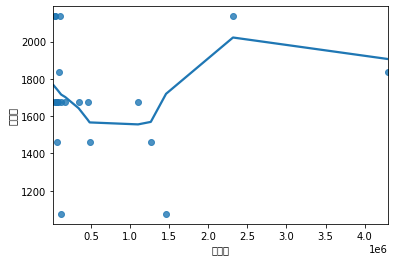

In [419]:
sns.regplot(df['매출액'],df['신뢰도'], lowess=True)

<AxesSubplot:xlabel='매출액', ylabel='환불비율'>

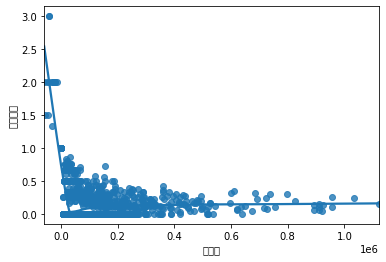

In [422]:
sns.regplot(df['매출액'][30:],df['환불비율'][30:], lowess=True)

<AxesSubplot:xlabel='매출액', ylabel='반품비율'>

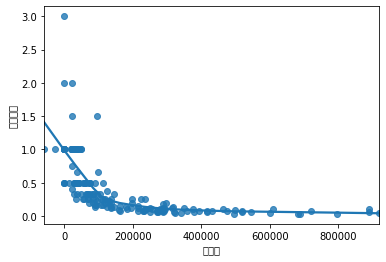

In [424]:
sns.regplot('매출액', '반품비율', lowess=True, data = df[30:])

* 선형성 확인후 회귀분석 시작

In [438]:
df2 = df[["매출액","신뢰도","환불비율"]].dropna(axis=0) 

In [439]:
x_data = df2[["신뢰도","환불비율"]] #X1 X2
target = df2[["매출액"]]# Y1

In [440]:
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [441]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.214
Date:                Thu, 19 Aug 2021   Prob (F-statistic):              0.320
Time:                        10:33:51   Log-Likelihood:                -318.96
No. Observations:                  21   AIC:                             643.9
Df Residuals:                      18   BIC:                             647.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.345e+05   1.34e+06      0.175      0.863   -2.58e+06    3.05e+06
신뢰도           50.0317    784.781      0.064      0.950   -1598.732    1698.795
환불비율        2.923e+06    1.9e+06      1.540      0.141   -1.06e+06    6.91e+06
==============================================================================
Omnibus:                       20.030   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.846
Skew:                           1.783   Prob(JB):                     2.44e-06
Kurtosis:                       7.102   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 각 변수의 계수 확인

In [246]:
fitted_multi_model.params

const     6373.509412
구매의사     22370.531017
긍정확률      8657.789026
환불수량    -13571.114631
욕망지표     -1830.842730
dtype: float64

* 각 변수들끼리 상관성 확인

In [167]:
x_data2.corr()

,구매의사,긍정확률,환불수량
구매의사,1.000000,0.028570,-0.031673
긍정확률,0.028570,1.000000,0.049035
환불수량,-0.031673,0.049035,1.000000
